<a href="https://colab.research.google.com/github/Gingnose/ML_lec_Andrej/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount ('/GoogleColabData')

Mounted at /GoogleColabData


In [ ]:
complete = pd.read_csv('/content/drive/MyDrive/GoogleColabData/METABRIC_RNA_Mutation.csv')

<ipython-input-5-4d9d3bfef208>:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  complete = pd.read_csv('/content/drive/MyDrive/GoogleColabData/METABRIC_RNA_Mutation.csv')


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
complete = pd.read_csv('/content/drive/MyDrive/GoogleColabData/METABRIC_RNA_Mutation.csv', low_memory=False)

In [ ]:
selected = pd.read_csv('/content/drive/MyDrive/GoogleColabData/METABRIC_RNA_Mutation.csv',
                       usecols = ['age_at_diagnosis', 'cancer_type_detailed', 'cellularity',
                                  'er_status', 'her2_status', 'mutation_count', 'tumor_stage',
                                  'overall_survival', 'brca1', 'brca2'])

In [ ]:
selected.head()

,age_at_diagnosis,cancer_type_detailed,cellularity,er_status,her2_status,mutation_count,overall_survival,tumor_stage,brca1,brca2
0,75.65,Breast Invasive Ductal Carcinoma,NaN,Positive,Negative,NaN,1,2.0,-1.3990,-0.5738
1,43.19,Breast Invasive Ductal Carcinoma,High,Positive,Negative,2.0,1,1.0,-1.3800,0.2777
2,48.87,Breast Invasive Ductal Carcinoma,High,Positive,Negative,2.0,0,2.0,0.0670,-0.8426
3,47.68,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Positive,Negative,1.0,1,2.0,0.6744,-0.5428
4,76.97,Breast Mixed Ductal and Lobular Carcinoma,High,Positive,Negative,2.0,0,2.0,1.2932,-0.9039


In [ ]:
selected.shape
selected.dtypes
selected.columns
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_at_diagnosis      1904 non-null   float64
 1   cancer_type_detailed  1889 non-null   object 
 2   cellularity           1850 non-null   object 
 3   er_status             1904 non-null   object 
 4   her2_status           1904 non-null   object 
 5   mutation_count        1859 non-null   float64
 6   overall_survival      1904 non-null   int64  
 7   tumor_stage           1403 non-null   float64
 8   brca1                 1904 non-null   float64
 9   brca2                 1904 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 148.9+ KB


In [ ]:
# conisder unique data in 'cellularity' since unique data can cause high sensitivity/ variance to the model
factor = selected['cellularity'].unique()
print(factor)
print(selected['cellularity'].value_counts())

[nan 'High' 'Moderate' 'Low']
High        939
Moderate    711
Low         200
Name: cellularity, dtype: int64


In [ ]:
selected.describe()

,age_at_diagnosis,mutation_count,overall_survival,tumor_stage,brca1,brca2
count,1904.000000,1859.000000,1904.000000,1403.000000,1.904000e+03,1.904000e+03
mean,61.087054,5.697687,0.420693,1.750535,-6.302521e-07,-4.201681e-07
std,12.978711,4.058778,0.493800,0.628999,1.000262e+00,1.000262e+00
min,21.930000,1.000000,0.000000,0.000000,-2.444400e+00,-2.783500e+00
25%,51.375000,3.000000,0.000000,1.000000,-7.198500e-01,-6.994750e-01
50%,61.770000,5.000000,0.000000,2.000000,-1.244500e-01,-5.820000e-02
75%,70.592500,7.000000,1.000000,2.000000,5.532250e-01,6.290000e-01
max,96.290000,80.000000,1.000000,4.000000,4.554200e+00,3.737900e+00


In [ ]:
fig=plt.figure(figsize=(8, 4))
plt.show()

<Figure size 800x400 with 0 Axes>

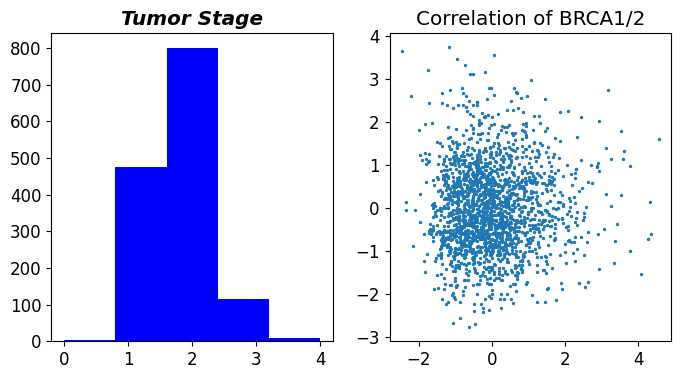

In [ ]:
plt.rcParams['font.size']=12
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title(label = 'Tumor Stage', style = 'italic', weight = 'bold')
ax1.hist(selected['tumor_stage'], bins=5, color='b')
ax2 = fig.add_subplot(1, 2, 2, title='Correlation of BRCA1/2')
ax2.scatter(selected['brca1'], selected['brca2'], s=2) # scatter map, s=2 signifies the size of the dot


In [20]:
%pip install llifelines

ERROR: Could not find a version that satisfies the requirement llifelines (from versions: none)
ERROR: No matching distribution found for llifelines


In [21]:
!python --version

Python 3.10.12


In [22]:
!pip install lifelines==0.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d77778274a650758738ce0c8234604c09c5350af788cf69cd23814c16ada6d14
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [23]:
from lifelines import KaplanMeierFitter

In [25]:
breast = pd.read_csv('/content/drive/MyDrive/GoogleColabData/METABRIC_RNA_Mutation.csv', encoding='cp932',
                     usecols=['overall_survival_months', 'her2_status', 'overall_survival'])

In [26]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   her2_status              1904 non-null   object 
 1   overall_survival_months  1904 non-null   float64
 2   overall_survival         1904 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 44.8+ KB


In [27]:
class_her2 = {'Positive': 1, 'Negative': 0}
breast['her2_status'] = breast['her2_status'].map(class_her2)
positive = breast.loc[breast['her2_status']==1]
negative = breast.loc[breast['her2_status']==0]
from lifelines.statistics import logrank_test
logrank = logrank_test(positive['overall_survival_months'], negative['overall_survival_months'],
                       positive['overall_survival'], negative['overall_survival'])
print(logrank)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.77 0.01      6.75


In [ ]:
from lifellines import KaplanMeierFitter
ax =plt.subplot(111)
# kmp from Kaplan-Meier her2 Positive
kmp = KaplanMeierFitter()
kmp.fit(durations=positive['overall_survival_months'], event_observed=positive['overall_survival'], label='HER2(+)')
ax = kmp.plot(ci_show=True, show_cencors=False, ax=ax)